# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [7]:
#Importando librerias
import pandas as pd

# Your code here.
student_data = pd.DataFrame({'StudentID':[i for i in range(1,11)],
                             'Age':[17,51,27,21,36,48,19,26,54,30],
                             'Tardies':[10,1,5,9,4,2,9,6,0,3]})
#Definiendo el índex
student_data.set_index('StudentID', inplace = True)

student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

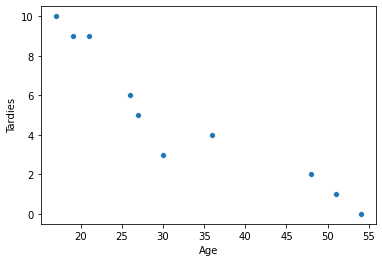

In [5]:
# Your code here.
#Importando libreria
import seaborn as sns

sns.scatterplot(student_data['Age'], student_data['Tardies'])


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

#I see a trend, which is the more age students are, the less late they are

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [71]:
# Your response here.

#importando libreria
import numpy as np
from numpy import cov


#Obteniendo covarianza
covariance = student_data.cov()

print(covariance)


#The covariance between the two variables is -45.5666. 
#We can see that it is negative, suggesting the variables change in opossite direction as we expect.

#Obteniendo correlation
correlation = student_data.corr()
print (correlation)

#We can see that the two variables are negatively correlated and that the correlation is -0.93 
#This suggests a high level of correlation.

                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Your response here.
#Importando libreria
from scipy.stats import linregress

#I'll do a linear regression because I have evidence that both variables are strongly related.

#Se supone que este es el modelo de acuerdo con los datos que tengo
x = student_data.Age
y = student_data.Tardies
linreg_model = linregress(x, y)
linreg_model

#The equation is y = -0.2428 x + 12.888

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

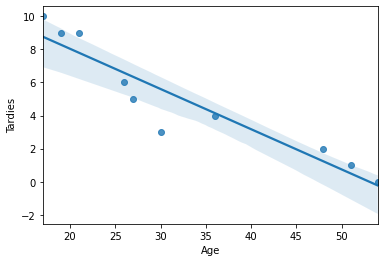

In [23]:
# Your code here.
#Graficando
sns.regplot(x = 'Age', y = 'Tardies', data = student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [24]:
# Your response here. 

#The r value is close to 1, which means the model is good and the fact that is negative
#means that while x increases, y decreases


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [40]:
# Import any libraries you may need & the data

#Importando librerias 
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

#Descargando dataset
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

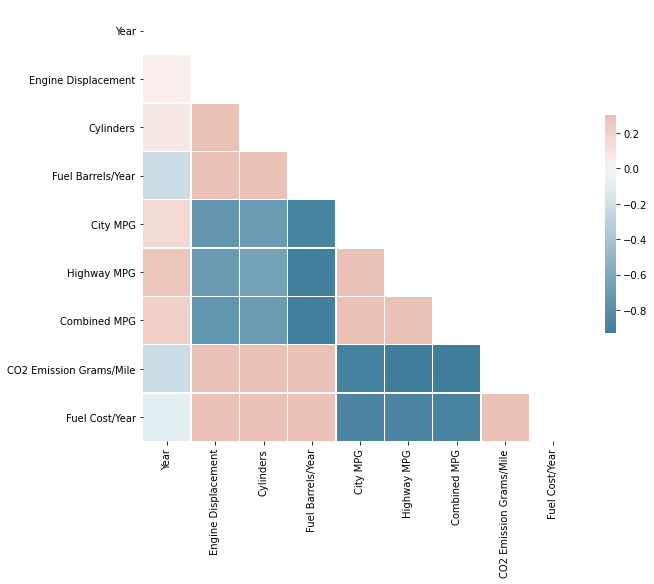

In [39]:
# Your response here. 

#Obtuve la correlación y mientras más cercana sea a 1, más influye en el modelo
corr = vehicles.corr()

#Voy a graficar la correlación para que sea más visible

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5});

#By the colors we can observe that the variables which explain CO2 emissions
#the most might be City MPG, Highway MPG, Combined MPG but negatively because values are nearest to 1
# Year is neutral
# the less might be Engine Displacement, Cylinders, Fuel Barrels/Year but positively

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [72]:
# Your response here. 
#I'll use linear regression

#Creando X y Y
x = vehicles[['City MPG', 'Highway MPG', 'Combined MPG']]
y = vehicles['CO2 Emission Grams/Mile']

# Va a asginar el 20% de mi dataset para entrenar el modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2) 

#Encuentra la línea de mejor ajuste
linreg = LinearRegression() 

#Definimos nuestro modelo de clasificación, entrenamos el modelo
linreg.fit(x_train, y_train) 

coefficient = linreg.coef_
vehicles_R2 = linreg.score(x,y)
y_intercept = linreg.intercept_






In [73]:
# También obtuve los coeficientes de esta manera, pero no sé por qué cambian o varían

coeff_df = pd.DataFrame (linreg.coef_, x.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
City MPG,7.277379
Highway MPG,-6.431350
Combined MPG,-21.097954


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [74]:
# Your response here. 
print (f'Coeficientes:{coefficient}')
print (f'R-squared:{vehicles_R2}')
print (f'y_intercept:{y_intercept}')

#Per R-squared the value is close to 1 which means it is a good model, I might use all values to compare 
#and the define which model fits the most



Coeficientes:[  7.27737913  -6.43135048 -21.09795429]
R-squared:0.8725196300612073
y_intercept:920.9692461884181


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [61]:
# Your code here. 

#X: number of people invited
#Y: number of people who attended

#H_0 the more people I invite the more people unable to attend

# Generando df
df = pd.DataFrame({'X':[1,3,4,6,8,9,11,14],
                             'Y':[1,2,4,4,5,7,8,13]})

df


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

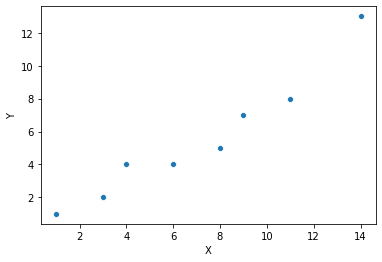

In [56]:
# Your code here.
x = df.X
y = df.Y

sns.scatterplot(x, y);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

         X        Y
X  1.00000  0.96523
Y  0.96523  1.00000
           X          Y
X  18.857143  16.000000
Y  16.000000  14.571429
LinregressResult(slope=0.7149532710280374, intercept=-0.028037383177569986, rvalue=0.9860712188265768, pvalue=0.0002896652494667462, stderr=0.06029667243254201)


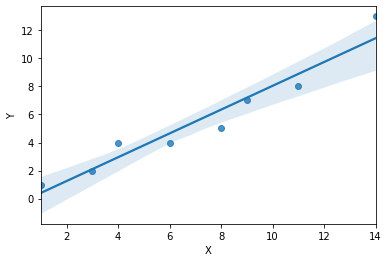

In [81]:
# Your response here. 
#I see a trend, I see both variables related positively which means that
#the more people is invited, the more people is missing

corr = df.corr()
cov = df.cov()

print(corr)
print(cov)

#Correlation between both variables is positive and strong enough because value is close to 1.


#Generando el modelo
linreg_model = linregress(x, y)
print(linreg_model)

#Graficando modelo
sns.regplot(x = 'X', y = 'Y', data = df);

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

LinregressResult(slope=0.7149532710280374, intercept=-0.028037383177569986, rvalue=0.9860712188265768, pvalue=0.0002896652494667462, stderr=0.06029667243254201)


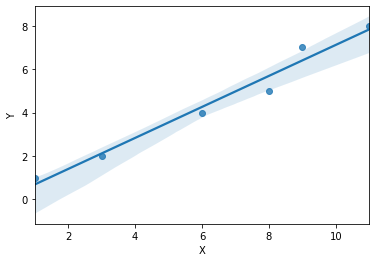

In [82]:
# Your response here. 
#There are some outliers, so I'll remove some points, this is an underfitting error as I remember
update_df = df.drop([2,7])
update_df

x = update_df.X
y = update_df.Y

linreg_model_2 = linregress(x, y)
print(linreg_model)


sns.regplot(x = 'X', y = 'Y', data = update_df);

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [80]:
# Your response here. 
print(linreg_model)
print(linreg_model_2)


#Both models have the same slope, intercept, rvalue and pvalue, whichs means that both have outliers
#We know that there are always outliers but the more data we have, models are more suitable


LinregressResult(slope=0.7149532710280374, intercept=-0.028037383177569986, rvalue=0.9860712188265768, pvalue=0.0002896652494667462, stderr=0.06029667243254201)
LinregressResult(slope=0.7149532710280374, intercept=-0.028037383177569986, rvalue=0.9860712188265768, pvalue=0.0002896652494667462, stderr=0.06029667243254201)
